# **I. Basic Probability**

In [1]:
# question 1

import numpy as np

def compute_mean(X):
  return np.sum(X) / len(X)

X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]

print("Mean : ", compute_mean(X))

Mean :  1.8


In [2]:
# question 2

def compute_median(X):
  size = len(X)
  X = np.sort(X)
  print(X)
  if (size % 2 == 0):
    return (1/2*(X[int(size/2)-1] \
                 + (X[int(size/2) + 1 - 1])))
  else:
    return X[int((size+1)/2)-1]

X = [1, 5, 4, 4, 9, 13]
print("Median: ", compute_median(X))

[ 1  4  4  5  9 13]
Median:  4.5


In [3]:
# question 3

def compute_std(X):
  mean = compute_mean(X)
  variance = 0
  for x in X:
    variance = variance + (x - mean)**2
  variance = variance / len(X)
  return np.sqrt(variance)

X = [ 171, 176, 155, 167, 169, 182]
print(np.round(compute_std(X),2))

8.33


In [4]:
data = np.array([ 171, 176, 155, 167, 169, 182])

print("Mean: ", np.mean(data))
print("edian: ", np.median(data))
print("Std: ", np.std(data))
print("Variance: ", np.var(data))

Mean:  170.0
edian:  170.0
Std:  8.32666399786453
Variance:  69.33333333333333


In [5]:
# question 4

def compute_correlation_cofficient(X, Y):
  N = len(X)
  numerator = N * X.dot(Y) - np.sum(X)*np.sum(Y)
  denominator = np.sqrt(N*np.sum(np.square(X))-np.sum(X)**2) \
    * np.sqrt(N*np.sum(np.square(Y))-np.sum(Y)**2)

  return np.round(numerator / denominator,2)

X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray([4, 25, 121, 36, 16, 225, 81])
print("Correlation: ", compute_correlation_cofficient(X,Y))

Correlation:  0.42


In [ ]:
data = np.random.uniform(0, 1, (2, 3))
data

array([[0.78272146, 0.47974191, 0.68902883],
       [0.40995559, 0.35052769, 0.87228632]])

In [ ]:
data = np.random.normal(0, 1, (2, 3))
data

array([[ 2.57209893,  0.63685587,  0.93404438],
       [-0.14875354,  0.51704678, -0.14175513]])

#**II. Tabular Data Analysis**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.8MB/s]


In [8]:
data = pd.read_csv("./advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
data.head(5), data.tail(5)

(      TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3   12.0
 3  151.5   41.3       58.5   16.5
 4  180.8   10.8       58.4   17.9,
         TV  Radio  Newspaper  Sales
 195   38.2    3.7       13.8    7.6
 196   94.2    4.9        8.1   14.0
 197  177.0    9.3        6.4   14.8
 198  283.6   42.0       66.2   25.5
 199  232.1    8.6        8.7   18.4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
def correlation(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

  if denominator == 0:
    return 0  # Handle cases where the denominator is zero

  return numerator / denominator

In [13]:
x = data['Radio']
y = data['Newspaper']

result = correlation(x, y)
print(round(result, 2))

0.35


In [15]:
# question 5

x = data['TV']
y = data['Radio']

corr_xy = correlation(x, y)
print(f"Correlation between TV and Sales: {round(corr_xy, 2)}")

Correlation between TV and Sales: 0.05


In [16]:
# question 6
features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
  for feature_2 in features:
      correlation_value = correlation(data[feature_1], data[feature_2])
      print(f"{feature_1} and {feature_2}: {round(correlation_value, 2)}")

TV and TV: 1.0
TV and Radio: 0.05
TV and Newspaper: 0.06
Radio and TV: 0.05
Radio and Radio: 1.0
Radio and Newspaper: 0.35
Newspaper and TV: 0.06
Newspaper and Radio: 0.35
Newspaper and Newspaper: 1.0


In [18]:
# question 7

x = data['Radio']
y = data['Newspaper']

result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [19]:
# question 8
# Calculate the correlation matrix
data_corr_coef = data.corr()
data_corr_coef

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


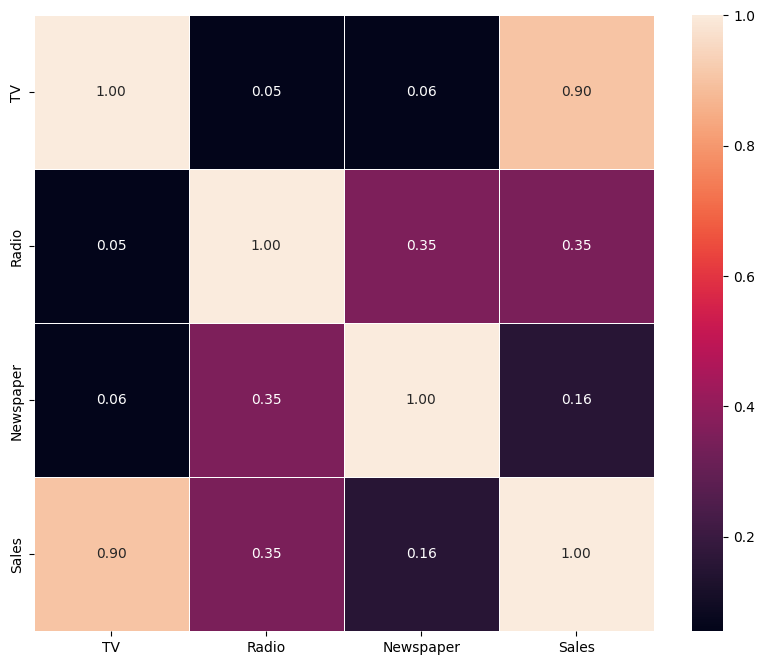

In [20]:
# question 9
plt.figure(figsize=(10,8))
sns.heatmap(data_corr_coef, annot=True, fmt=".2f", linewidth=.5)
plt.show()

#**III. Text Retrieval**

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
!gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: /content/vi_text_retrieval.csv
100% 201k/201k [00:00<00:00, 79.7MB/s]


##**TF-IDF**

In [ ]:
vi_data_df = pd.read_csv("./vi_text_retrieval.csv")

In [ ]:
vi_data_df

,id,question,text
0,1570446247,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch..."
1,1570445661,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...
2,1570382095,Quân đội Hoa Kỳ gồm những lực lượng nào,Quân đội Hoa Kỳ hay Các lực lượng vũ trang Hoa...
3,1570382072,Ngọc Lan là ai,Ngọc Lan ( 28 tháng 12 năm 1956 - 6 tháng 3 20...
4,1570382037,Thu Phương từng được những giải thưởng nào,Cô được coi là một trong những ca sĩ thuộc thế...
...,...,...,...
495,1569486091,Dân số của Sóc Trăng đứng thứ mấy trong khu vự...,Sóc Trăng là một tỉnh ven biển thuộc đồng bằng...
496,1569486072,Các nguyên lý toán học của triết học tự nhiên ...,Đây là những điều cơ bản tiên quyết của cơ học...
497,1569486003,Biến đổi khí hậu Trái Đất là gì,Biến đổi khí hậu là những biến đổi trong môi t...
498,1569485614,Phanxicô Xaviê Trương Bửu Diệp mất vào năm nào,Phanxicô Xaviê Trương Bửu Diệp ( 1 tháng 1 năm...


In [ ]:
context = vi_data_df['text']

In [ ]:
context = [doc.lower() for doc in context]

In [ ]:
context[:5]

['năm 2013 , nguyễn quang hải giành chức vô địch u21 quốc gia 2013 cùng với đội trẻ hà nội t&t và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch u21 quốc gia .',
 'một trận đấu bóng đá thông thường có hai hiệp , mỗi hiệp 45 phút với khoảng thời gian 15 phút nghỉ giữa hai hiệp .',
 'quân đội hoa kỳ hay các lực lượng vũ trang hoa kỳ là tổng hợp các lực lượng quân sự thống nhất của hoa kỳ . các lực lượng này gồm có lục quân , hải quân , thuỷ quân lục chiến , không quân và tuần duyên .',
 'ngọc lan ( 28 tháng 12 năm 1956 - 6 tháng 3 2001 ) là một ca sĩ hải ngoại nổi tiếng . không chỉ với giọng hát , cô còn được khán giả đặc biệt yêu mến vì khuôn mặt khả ái và tính cách nhút nhát , khiêm tốn của mình .',
 'cô được coi là một trong những ca sĩ thuộc thế hệ thứ hai của nền nhạc nhẹ việt nam đạt được nhiều giải thưởng nhất .']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
context_embedded = tfidf_vectorizer.fit_transform(context)

In [ ]:
context_embedded.shape

(500, 2913)

In [ ]:
context_embedded.toarray()[7][0]

0.31126580760710637

In [23]:
# question 10
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vi_data_df = pd.read_csv("./vi_text_retrieval.csv")
context = vi_data_df['text']
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

0.31126580760710637

##**Retrieval**

###**Cosine Similarity**

In [ ]:
vi_data_df.iloc[0]

id                                                 1570446247
question    Quang Hải giành được chức vô địch U21 quốc gia...
text        Năm 2013 , Nguyễn Quang Hải giành chức vô địch...
Name: 0, dtype: object

In [ ]:
question = vi_data_df.iloc[0]['question']
question

'Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi'

In [ ]:
query_embedded = tfidf_vectorizer.transform([question.lower()])
query_embedded.shape

(1, 2913)

In [ ]:
cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))

In [ ]:
cosine_scores.shape

(500,)

In [ ]:
# Get stop cosine similarity score
top_d = 5
for idx in cosine_scores.argsort()[-top_d:][::-1]:
    print("Score: ", cosine_scores[idx])
    print(vi_data_df.iloc[idx, 2])
    print("=======")

Score:  0.6279910475266974
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Score:  0.2114579586225163
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Score:  0.17714753149794465
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The Invincibles ( tiếng Việt : " Đội bóng bất bại " ) và giành Cúp vàng Ngoại hạng Anh .
Score:  0.15971218395887335
Tây Ban N

In [ ]:
def tfidf_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))
    results = []
    for idx in cosine_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'cosine_score':cosine_scores[idx]
        }
        results.append(doc)
    return results

In [ ]:
question = vi_data_df.iloc[0]['question']
print("Question: ", question)
results = tfidf_search(question, tfidf_vectorizer)
for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['cosine_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi
Id:  0
Score:  0.6279910475266974
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Id:  97
Score:  0.2114579586225163
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Id:  136
Score:  0.17714753149794465
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The Invincibles ( tiếng V

In [ ]:
question = vi_data_df.iloc[7]['question']
print("Question: ", question)
results = tfidf_search(question, tfidf_vectorizer)
for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['cosine_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Đế quốc Mông Cổ tồn tại khoảng thời gian nào
Id:  7
Score:  0.33596167176983205
Đế quốc Mông Cổ (tiếng Mông Cổ: Монголын эзэнт гүрэн, chuyển tự Mongol-yn Ezent Güren IPA: [mɔŋɡ(ɔ)ɮˈiːŋ ɛt͡sˈɛnt ˈɡurəŋ] (nghe)) là đế quốc du mục lớn nhất trong lịch sử, từng tồn tại trong các thế kỷ 13 và 14.[2] Khởi đầu trên vùng thảo nguyên Trung Á, đế quốc cuối cùng đã trải dài từ Đông Âu đến biển Nhật Bản, bao gồm nhiều phần rộng lớn của Siberi ở phía bắc và mở rộng về phía nam đến Đông Nam Á, tiểu lục địa Ấn Độ, cao nguyên Iran, và Trung Đông. Ở thời điểm đỉnh cao, đế quốc Mông Cổ trải dài 9.700 km (6.000 mi), diện tích lãnh thổ lên tới 24.000.000 km2 (9.300.000 sq mi),[3][4][5][6] và thống trị 100 triệu dân.
Id:  74
Score:  0.27474674050287234
Đế quốc Mông Cổ từng tồn tại trong các thế kỷ 13 và 14 , là đế quốc có lãnh thổ liền nhau lớn nhất trong lịch sử nhân loại . Khởi đầu trên vùng thảo nguyên Trung Á , đế quốc cuối cùng đã trải dài từ Đông Âu đến biển Nhật Bản , bao gồm nhiều phần rộ

In [24]:
# question 11

def tfidf_search(question, tfidf_vectorizer, top_d=5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))

    # Get top k cosine score and index its
    results = []
    for idx in cosine_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'cosine_score':cosine_scores[idx]
        }
        results.append(doc)
    return results

question = vi_data_df.iloc[0]['question']
results = tfidf_search(question, tfidf_vectorizer)
results[0]['cosine_score']

0.6279910475266973

###**Correlation**

In [ ]:
question = vi_data_df.iloc[0]['question']
question

'Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi'

In [ ]:
query_embedded = tfidf_vectorizer.transform([question.lower()])
query_embedded.shape

(1, 2913)

In [ ]:
corr_scores = np.corrcoef(
    query_embedded.toarray()[0],
    context_embedded.toarray()
)

In [ ]:
corr_scores.shape

(501, 501)

In [ ]:
corr_scores[0][1:10]

array([ 0.62595998, -0.00477247,  0.02170301,  0.04041869,  0.019418  ,
        0.01144099,  0.04205915,  0.02519109, -0.00678129])

In [ ]:
corr_scores[0][1:].argsort()

array([ 68, 147, 161, 348, 374, 388, 278, 386, 141,  29, 495, 489, 130,
        63,  57,  45, 105, 298, 157, 473, 167, 407, 297, 215, 493, 462,
       411,  12, 248,  35, 255, 249, 430,  49,  20, 452,   8, 390, 182,
       254, 457, 221,  47, 485, 362, 207, 304, 442, 145,  28,  25, 318,
       322, 270,  52,  76, 196, 232, 389, 129, 436, 112, 265, 412,  32,
       124, 385, 360, 377, 332, 326, 438, 426, 135, 309, 316, 181, 359,
       464,  54, 160,   1, 117, 155, 276, 450, 333, 353, 443, 476, 198,
       328, 475, 237,  69, 274, 224, 444, 177, 213, 269, 284, 137, 133,
       150, 175, 173, 449, 354,  94, 172, 113, 497, 490, 190,  21,  62,
       294, 343, 357, 122, 192, 387,  38, 319, 132, 305, 423, 195, 378,
       199, 310, 415, 171, 236, 275, 459, 469, 461, 327, 401, 146, 398,
       271, 335,  43, 262, 342,  89, 483, 138, 153,  31, 466, 104, 235,
       280, 402, 455, 291, 323, 219,  98,  77, 499, 404,  18,  17, 373,
        75, 218, 264, 345,  22,  87, 456, 243, 370, 317, 453,  9

In [ ]:
# Get stop cosine similarity score
top_d = 5
for idx in corr_scores[0][1:].argsort()[-top_d:][::-1]:
    print("Score: ", corr_scores[0][idx])
    print(vi_data_df.iloc[idx, 2])
    print("=======")

Score:  1.0
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Score:  0.010218977799153024
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Score:  -0.005223983785487503
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The Invincibles ( tiếng Việt : " Đội bóng bất bại " ) và giành Cúp vàng Ngoại hạng Anh .
Score:  0.04719630867691377
Tây Ban Nha cũng là 

In [ ]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    corr_scores = np.corrcoef(
        query_embedded.toarray()[0],
        context_embedded.toarray()
    )
    corr_scores = corr_scores[0][1:]
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'corr_score':corr_scores[idx]
        }
        results.append(doc)
    return results

In [ ]:
question = vi_data_df.iloc[0]['question']
print("Question: ", question)
results = corr_search(question, tfidf_vectorizer)
for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['corr_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi
Id:  0
Score:  0.6259599752568777
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Id:  97
Score:  0.20734246471973258
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Id:  136
Score:  0.17124615520165054
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The Invincibles ( tiếng 

In [ ]:
question = vi_data_df.iloc[7]['question']
print("Question: ", question)
results = corr_search(question, tfidf_vectorizer)
for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['corr_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Đế quốc Mông Cổ tồn tại khoảng thời gian nào
Id:  7
Score:  0.3317381973605389
Đế quốc Mông Cổ (tiếng Mông Cổ: Монголын эзэнт гүрэн, chuyển tự Mongol-yn Ezent Güren IPA: [mɔŋɡ(ɔ)ɮˈiːŋ ɛt͡sˈɛnt ˈɡurəŋ] (nghe)) là đế quốc du mục lớn nhất trong lịch sử, từng tồn tại trong các thế kỷ 13 và 14.[2] Khởi đầu trên vùng thảo nguyên Trung Á, đế quốc cuối cùng đã trải dài từ Đông Âu đến biển Nhật Bản, bao gồm nhiều phần rộng lớn của Siberi ở phía bắc và mở rộng về phía nam đến Đông Nam Á, tiểu lục địa Ấn Độ, cao nguyên Iran, và Trung Đông. Ở thời điểm đỉnh cao, đế quốc Mông Cổ trải dài 9.700 km (6.000 mi), diện tích lãnh thổ lên tới 24.000.000 km2 (9.300.000 sq mi),[3][4][5][6] và thống trị 100 triệu dân.
Id:  437
Score:  0.2707711717980515
Dù là con số nào , nhà Chu vẫn là triều đại tồn tại lâu nhất trong lịch sử Trung Quốc .
Id:  74
Score:  0.2699863245722582
Đế quốc Mông Cổ từng tồn tại trong các thế kỷ 13 và 14 , là đế quốc có lãnh thổ liền nhau lớn nhất trong lịch sử nhân loại . K

In [27]:
# question 12

def corr_search(question, tfidf_vectorizer, top_d=5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    corr_scores = np.corrcoef(
        query_embedded.toarray()[0],
        context_embedded.toarray()
    )
    corr_scores = corr_scores[0][1:]

    # Get top k correlation score and index its
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'corr_score':corr_scores[idx]
        }
        results.append(doc)
    return results

question = vi_data_df.iloc[0]['question']
results = corr_search(question, tfidf_vectorizer, top_d=5)
results[1]['corr_score']

0.20734246471973258